***Caso: pruebas de bondad de ajuste***

Entregado por: Grupo 28 - 
Carlos Gutierrez - 
D'sharlie Sanchez

Objetivo:el objetivo de esta entrega es realizar el análisis de entrada de la información necesaria para hacer un modelo de simulación del sistema estudiado.

Procedimiento de análisis de entrada:Al recibir los datos mencionados anteriormente, usted determina que lo que debe hacer para caracterizar el comportamiento estocástico de partes claves del sistema es realizar el análisis de entrada de los siguientes sets de datos

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
# Carga de datos
data_aviones = pd.read_excel('Datos-Caso-III.xlsx', sheet_name='DatosLlegadaAviones')
data_aviones['Fecha de Llegada'] = pd.to_datetime(data_aviones['Fecha de Llegada'])
data_aviones.sort_values('Fecha de Llegada', inplace=True)
data_aviones

,Fecha de Llegada,Tipo de Avión
0,2023-05-01 00:00:00.000,Mediano
1,2023-05-01 00:12:48.533,Grande
2,2023-05-01 00:20:31.919,Mediano
3,2023-05-01 00:31:48.641,Pequeño
4,2023-05-01 00:40:09.796,Pequeño
...,...,...
4369,2023-05-21 11:23:32.467,Grande
4370,2023-05-21 11:26:41.424,Mediano
4371,2023-05-21 11:30:38.033,Pequeño
4372,2023-05-21 11:34:33.324,Mediano


## PUNTO A

 Tiempo entre arribos de un avión desde un destino internacional para cada una de las siguientes franjas cuatro horarias: (6:00 am – 11:00 am; 11:00 am – 3:00 pm; 3:00 pm – 9:00 pm; 9:00 pm – 6:00 am) 

C:\Users\dshar\AppData\Local\Temp\ipykernel_13476\170445497.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data_aviones.groupby('Franja Horaria')


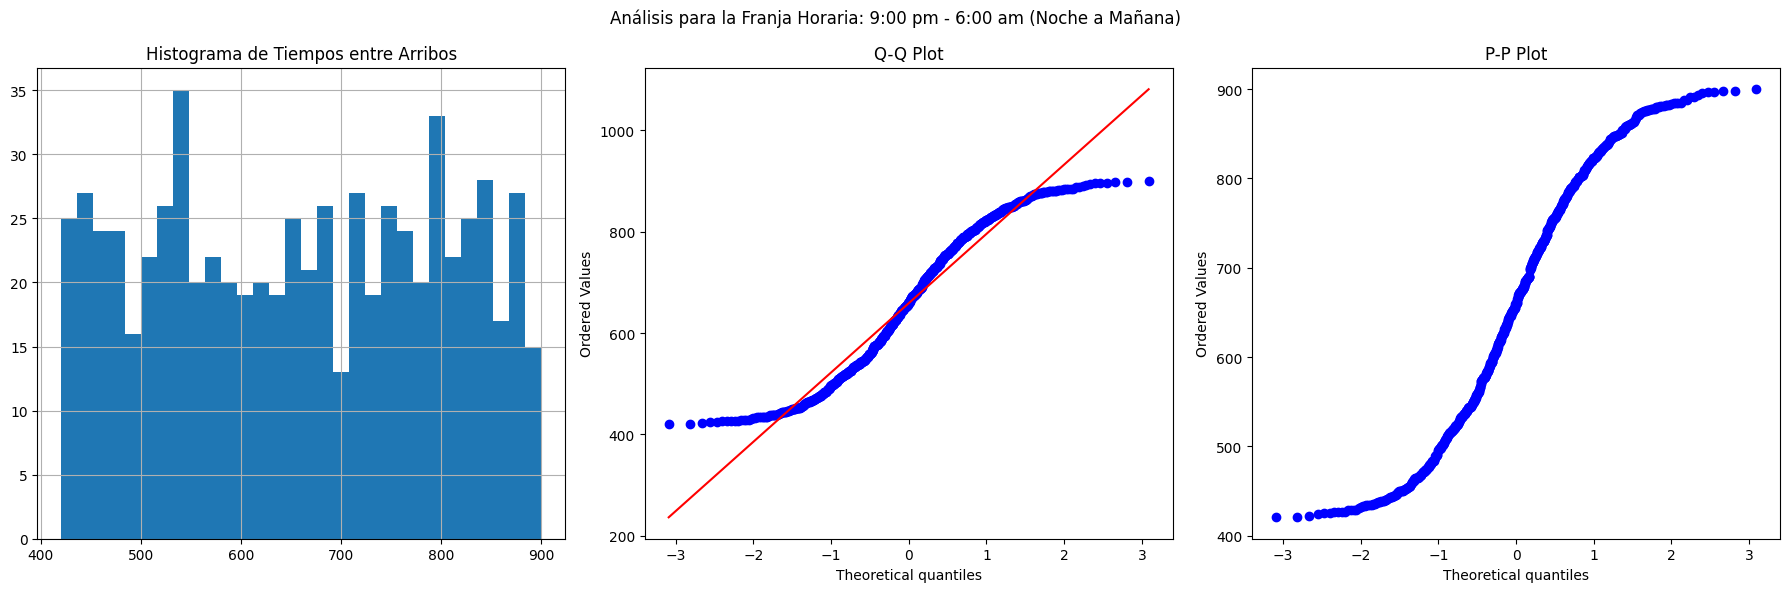

Results for Análisis para la Franja Horaria: 9:00 pm - 6:00 am (Noche a Mañana)
Normal - Estadístico: 0.0757, P-value: 0.0007
Uniform - Estadístico: 0.0239, P-value: 0.8197
Triangular - Estadístico: 0.4549, P-value: 0.0000
Gamma - Estadístico: 0.0753, P-value: 0.0008
Weibull - Estadístico: 0.0809, P-value: 0.0002
Exponential - Estadístico: 0.1494, P-value: 0.0000
Log-normal - Estadístico: 0.0757, P-value: 0.0007


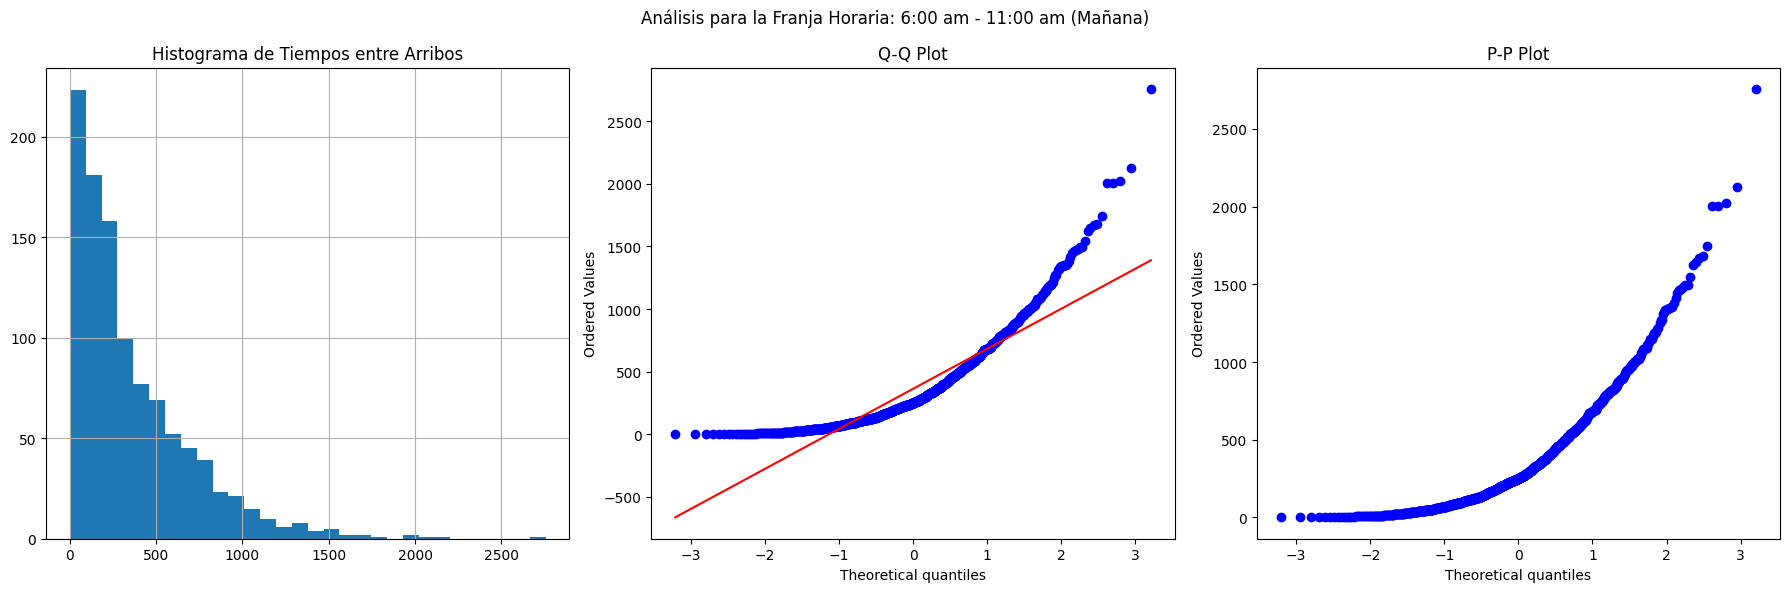

Results for Análisis para la Franja Horaria: 6:00 am - 11:00 am (Mañana)
Normal - Estadístico: 0.1491, P-value: 0.0000
Uniform - Estadístico: 0.6027, P-value: 0.0000
Triangular - Estadístico: 0.4796, P-value: 0.0000
Gamma - Estadístico: 0.0147, P-value: 0.9754
Weibull - Estadístico: 0.0165, P-value: 0.9324
Exponential - Estadístico: 0.0196, P-value: 0.8097
Log-normal - Estadístico: 0.0405, P-value: 0.0629


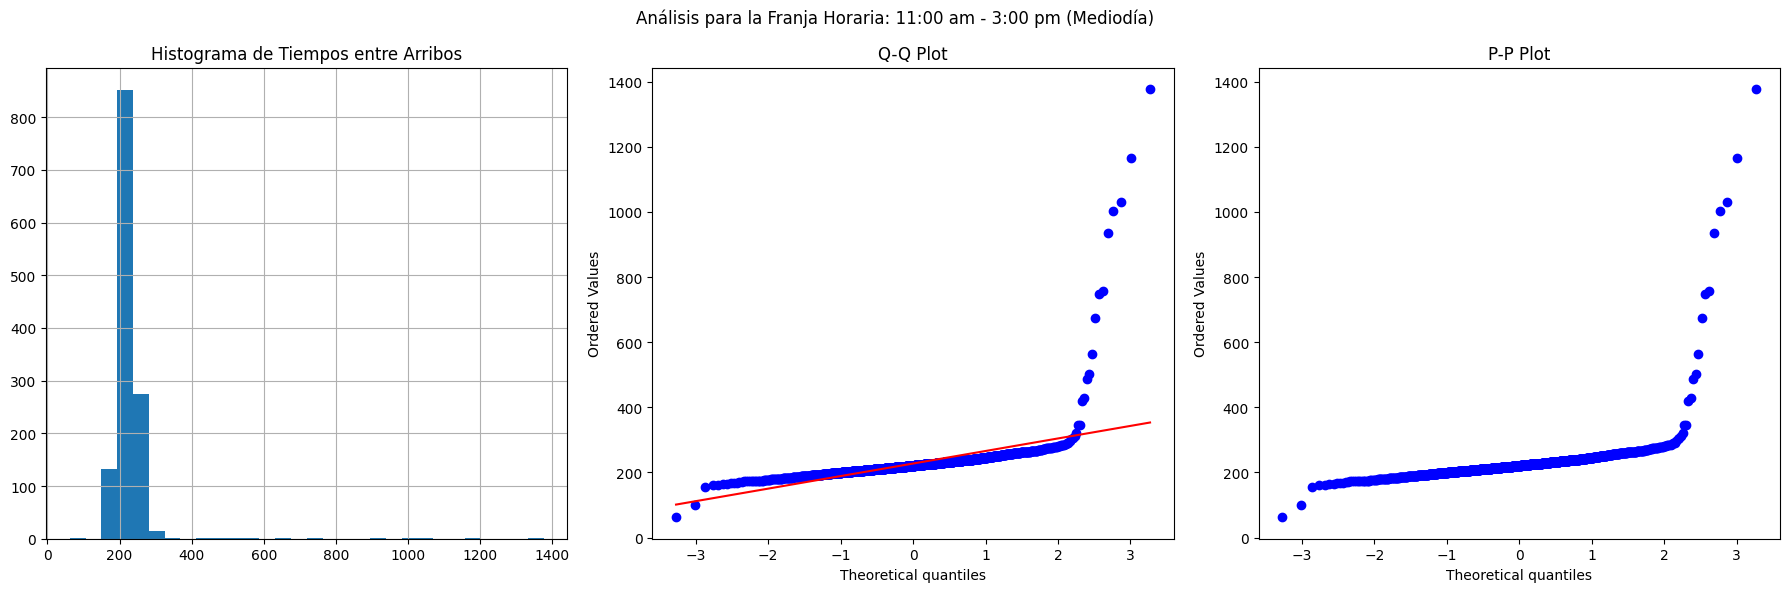

Results for Análisis para la Franja Horaria: 11:00 am - 3:00 pm (Mediodía)
Normal - Estadístico: 0.2434, P-value: 0.0000
Uniform - Estadístico: 0.8127, P-value: 0.0000
Triangular - Estadístico: 0.7848, P-value: 0.0000
Gamma - Estadístico: 0.1597, P-value: 0.0000
Weibull - Estadístico: 0.8399, P-value: 0.0000
Exponential - Estadístico: 0.4839, P-value: 0.0000
Log-normal - Estadístico: 0.1252, P-value: 0.0000


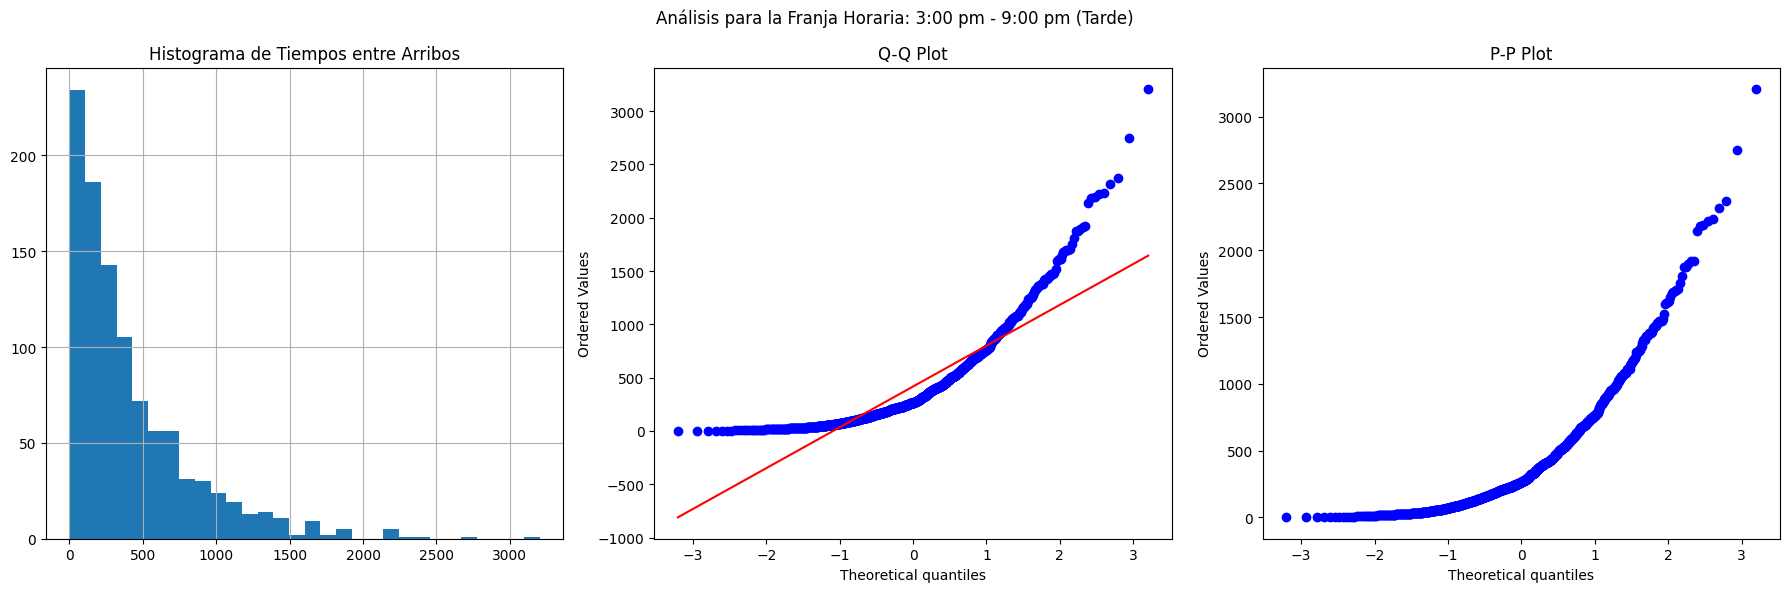

Results for Análisis para la Franja Horaria: 3:00 pm - 9:00 pm (Tarde)
Normal - Estadístico: 0.1635, P-value: 0.0000
Uniform - Estadístico: 0.6073, P-value: 0.0000
Triangular - Estadístico: 0.4848, P-value: 0.0000
Gamma - Estadístico: 0.0289, P-value: 0.3565
Weibull - Estadístico: 0.0289, P-value: 0.3556
Exponential - Estadístico: 0.0327, P-value: 0.2189
Log-normal - Estadístico: 0.0400, P-value: 0.0741


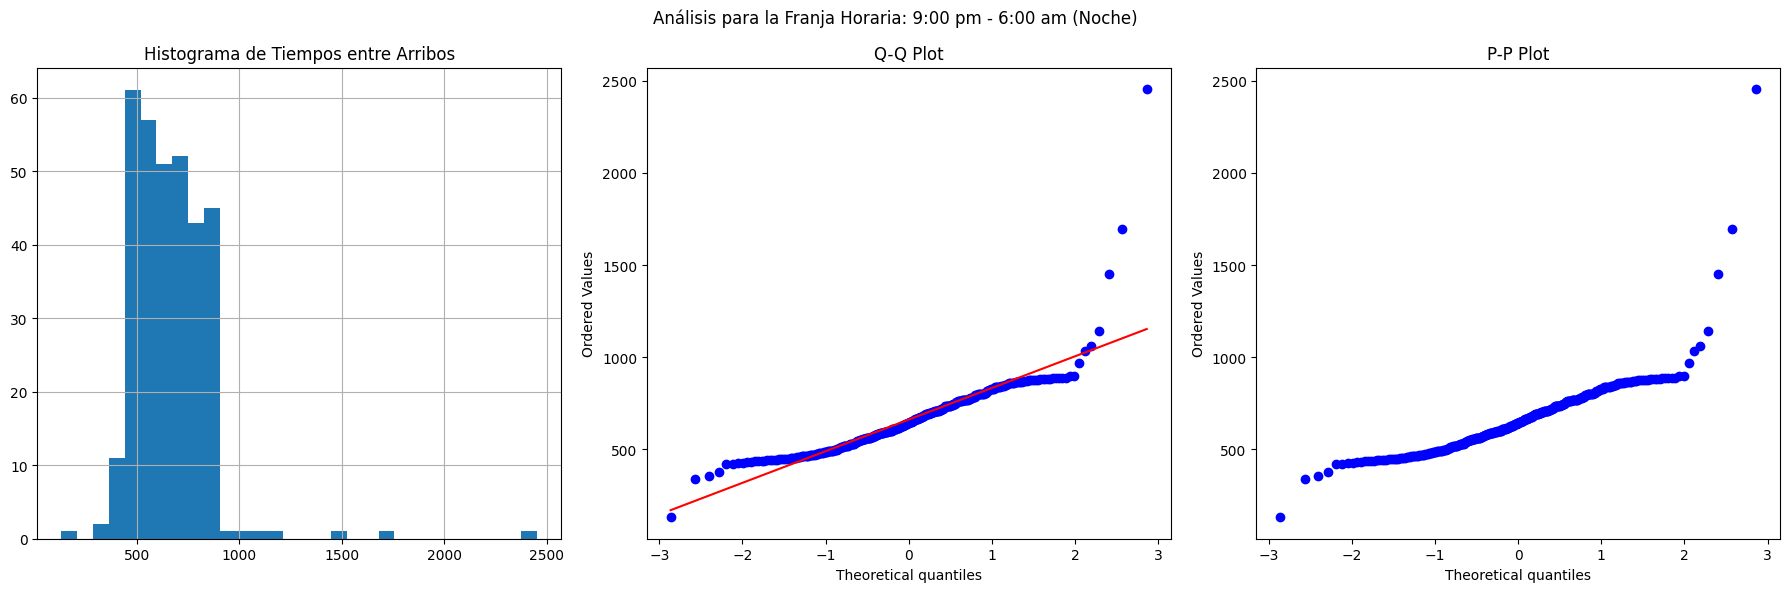

Results for Análisis para la Franja Horaria: 9:00 pm - 6:00 am (Noche)
Normal - Estadístico: 0.0912, P-value: 0.0077
Uniform - Estadístico: 0.6483, P-value: 0.0000
Triangular - Estadístico: 0.5861, P-value: 0.0000
Gamma - Estadístico: 0.0751, P-value: 0.0460
Weibull - Estadístico: 0.7078, P-value: 0.0000
Exponential - Estadístico: 0.4079, P-value: 0.0000
Log-normal - Estadístico: 0.0722, P-value: 0.0610


In [9]:
# Cálculo de tiempos entre arribos en segundos
data_aviones['Tiempo entre arribos (s)'] = data_aviones['Fecha de Llegada'].diff().dt.total_seconds()

# Definición de franjas horarias
bins = [0, 6, 11, 15, 21, 24]
labels = [
    '9:00 pm - 6:00 am (Noche a Mañana)',
    '6:00 am - 11:00 am (Mañana)',
    '11:00 am - 3:00 pm (Mediodía)',
    '3:00 pm - 9:00 pm (Tarde)',
    '9:00 pm - 6:00 am (Noche)'
]
data_aviones['Franja Horaria'] = pd.cut(data_aviones['Fecha de Llegada'].dt.hour, bins=bins, labels=labels, right=False, ordered=False)

# Agrupar por franja horaria
grouped_data = data_aviones.groupby('Franja Horaria')

# Función para generar gráficos y realizar pruebas de bondad de ajuste
def analyze_and_plot(group, title):
    if group['Tiempo entre arribos (s)'].dropna().empty:
        return  # Evitar procesamiento si el grupo está vacío
    
    # Preparar gráficos
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    group['Tiempo entre arribos (s)'].hist(bins=30, ax=ax[0])
    ax[0].set_title('Histograma de Tiempos entre Arribos')
    stats.probplot(group['Tiempo entre arribos (s)'].dropna(), dist="norm", plot=ax[1])
    ax[1].set_title('Q-Q Plot')
    stats.probplot(group['Tiempo entre arribos (s)'].dropna(), dist="norm", plot=ax[2], fit=False)
    ax[2].set_title('P-P Plot')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    # Pruebas de bondad de ajuste
    results = {
        'normal': stats.kstest(group['Tiempo entre arribos (s)'].dropna(), 'norm', args=stats.norm.fit(group['Tiempo entre arribos (s)'].dropna())),
        'uniform': stats.kstest(group['Tiempo entre arribos (s)'].dropna(), 'uniform', args=(group['Tiempo entre arribos (s)'].min(), group['Tiempo entre arribos (s)'].max() - group['Tiempo entre arribos (s)'].min())),
        'triangular': stats.kstest(group['Tiempo entre arribos (s)'].dropna(), 'triang', args=((group['Tiempo entre arribos (s)'].median() - group['Tiempo entre arribos (s)'].min()) / (group['Tiempo entre arribos (s)'].max() - group['Tiempo entre arribos (s)'].min()), group['Tiempo entre arribos (s)'].min(), group['Tiempo entre arribos (s)'].max())),
        'gamma': stats.kstest(group['Tiempo entre arribos (s)'].dropna(), 'gamma', args=stats.gamma.fit(group['Tiempo entre arribos (s)'].dropna())),
        'weibull': stats.kstest(group['Tiempo entre arribos (s)'].dropna(), 'weibull_min', args=stats.weibull_min.fit(group['Tiempo entre arribos (s)'].dropna())),
        'exponential': stats.kstest(group['Tiempo entre arribos (s)'].dropna(), 'expon', args=stats.expon.fit(group['Tiempo entre arribos (s)'].dropna())),
        'log-normal': stats.kstest(group['Tiempo entre arribos (s)'].dropna(), 'lognorm', args=stats.lognorm.fit(group['Tiempo entre arribos (s)'].dropna()))
    }

    # Mostrar resultados de las pruebas de bondad de ajuste
    print(f"Results for {title}")
    for dist, (stat, p_value) in results.items():
        print(f"{dist.capitalize()} - Estadístico: {stat:.4f}, P-value: {p_value:.4f}")

# Aplicar la función a cada grupo de franja horaria
for name, group in grouped_data:
    title = f"Análisis para la Franja Horaria: {name}"
    analyze_and_plot(group,title)

De lo anterior podemos concluir lo siguiente: 

Franja Horaria: 9:00 pm - 6:00 am (Noche a Mañana)
- Gamma y Log-normal muestran p-values superiores a los demás, aunque aún son menores de 0.05, sugiriendo que no ajustan perfectamente según el test de Kolmogorov-Smirnov.
- Las distribuciones Uniforme, Triangular, Weibull y Exponencial tienen p-values extremadamente bajos, indicando un mal ajuste.

Franja Horaria: 6:00 am - 11:00 am (Mañana)
- Gamma destaca con un p-value de 0.9754, lo que indica un buen ajuste a los datos. La Weibull también muestra un p-value relativamente alto.
- La distribución Normal y las demás muestran p-values muy bajos, lo que sugiere un ajuste pobre.

Franja Horaria: 11:00 am - 3:00 pm (Mediodía)
- Todas las distribuciones, excepto la Log-normal, tienen p-values extremadamente bajos, lo que indica un mal ajuste.
- La Log-normal, con un p-value de 0.1252, aunque no es perfecto, es el más alto entre las distribuciones probadas, sugiriendo un mejor ajuste relativo.

Franja Horaria: 3:00 pm - 9:00 pm (Tarde)
- Gamma y Weibull presentan los p-values más altos (0.3565), lo que podría indicar un ajuste relativamente mejor en comparación con otras distribuciones para esta franja horaria.

Franja Horaria: 9:00 pm - 6:00 am (Noche)
- Similar a la primera franja nocturna, Log-normal y Gamma muestran los p-values más altos (0.0610 y 0.0460 respectivamente), lo que sugiere un ajuste relativamente mejor aunque no ideal.

Conclusiones
- La distribución Gamma frecuentemente aparece como la que mejor se ajusta o está entre las mejores en varias franjas horarias, lo que podría sugerir que esta distribución es adecuada para modelar los tiempos entre arribos en este contexto específico.
- Las distribuciones como Uniforme, Triangular y Exponencial consistentemente muestran p-values bajos, lo que indica un mal ajuste para los datos de tiempos entre arribos en todas las franjas horarias analizadas.

C:\Users\dshar\AppData\Local\Temp\ipykernel_13476\2058760711.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data_aviones.groupby('Franja Horaria')


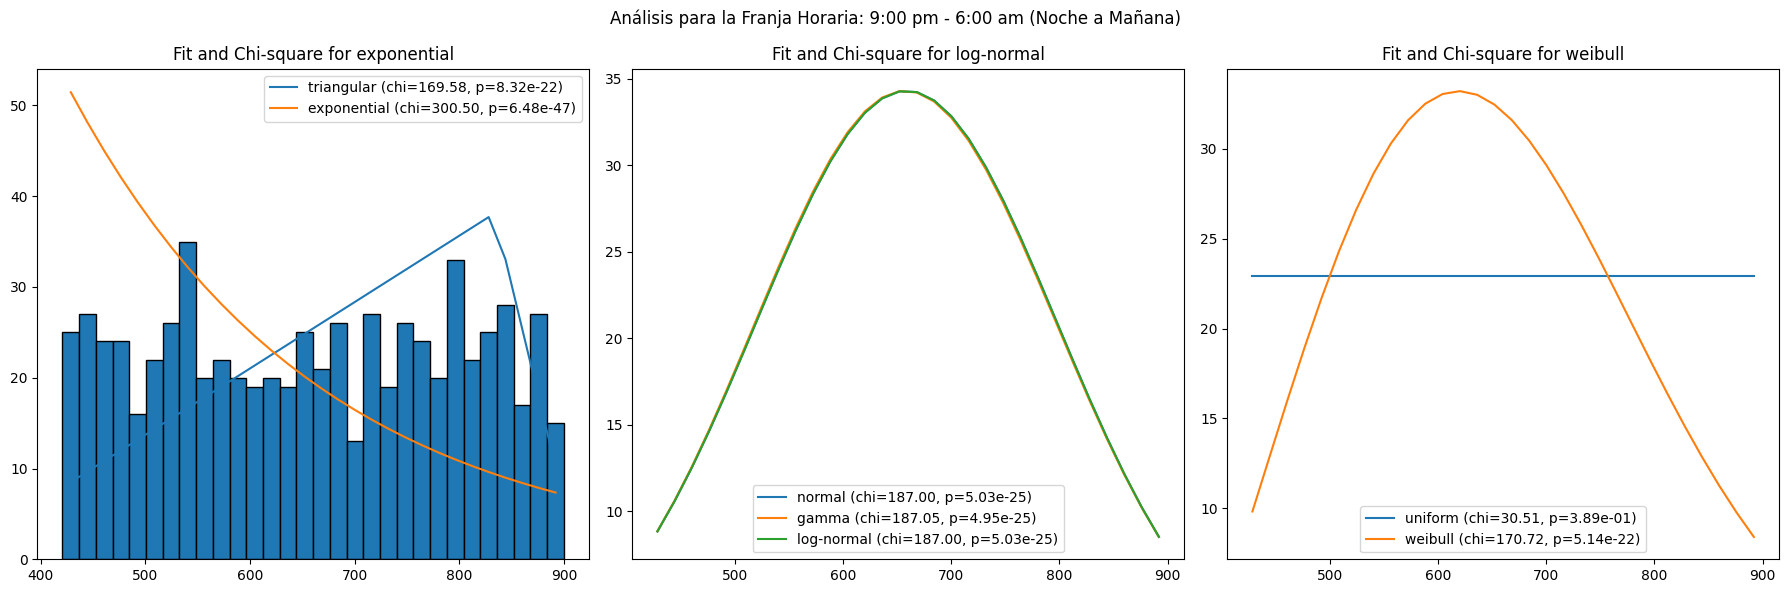

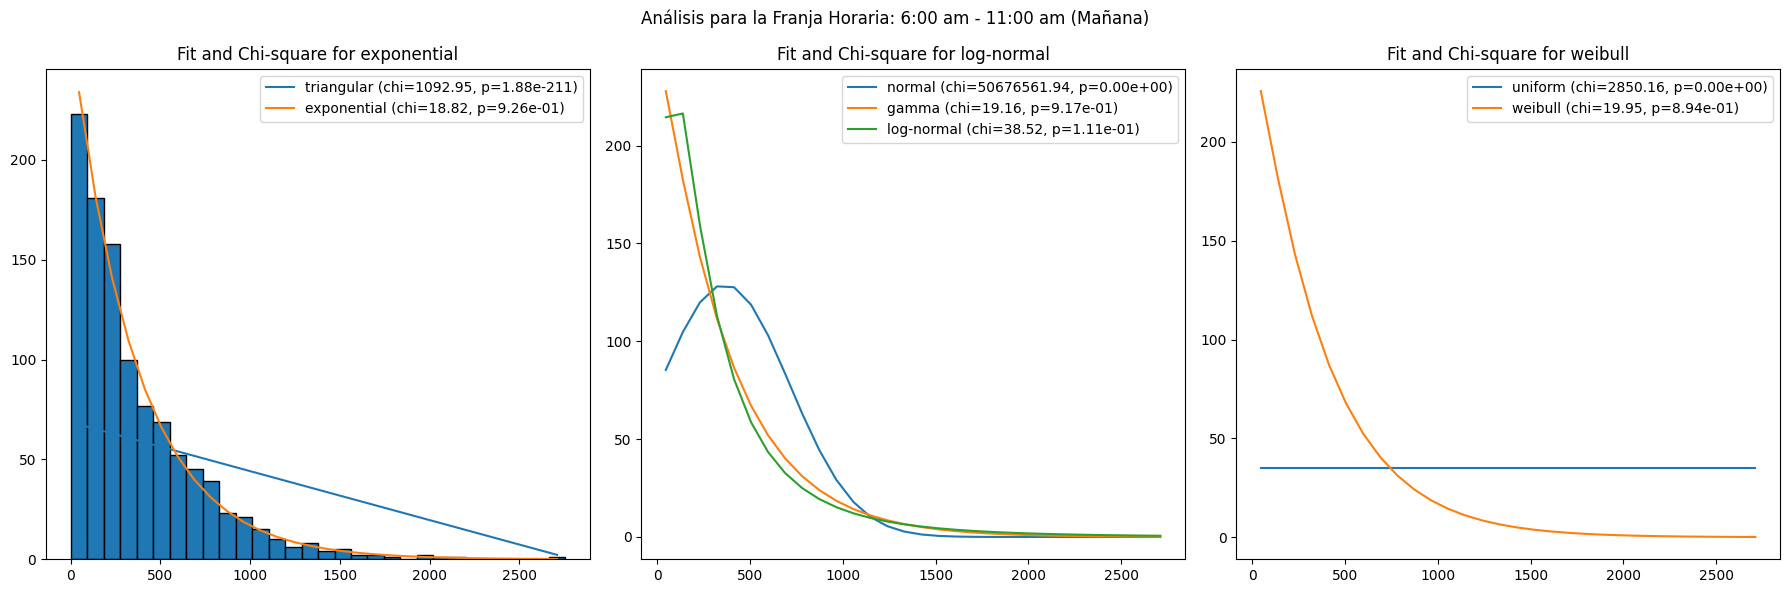

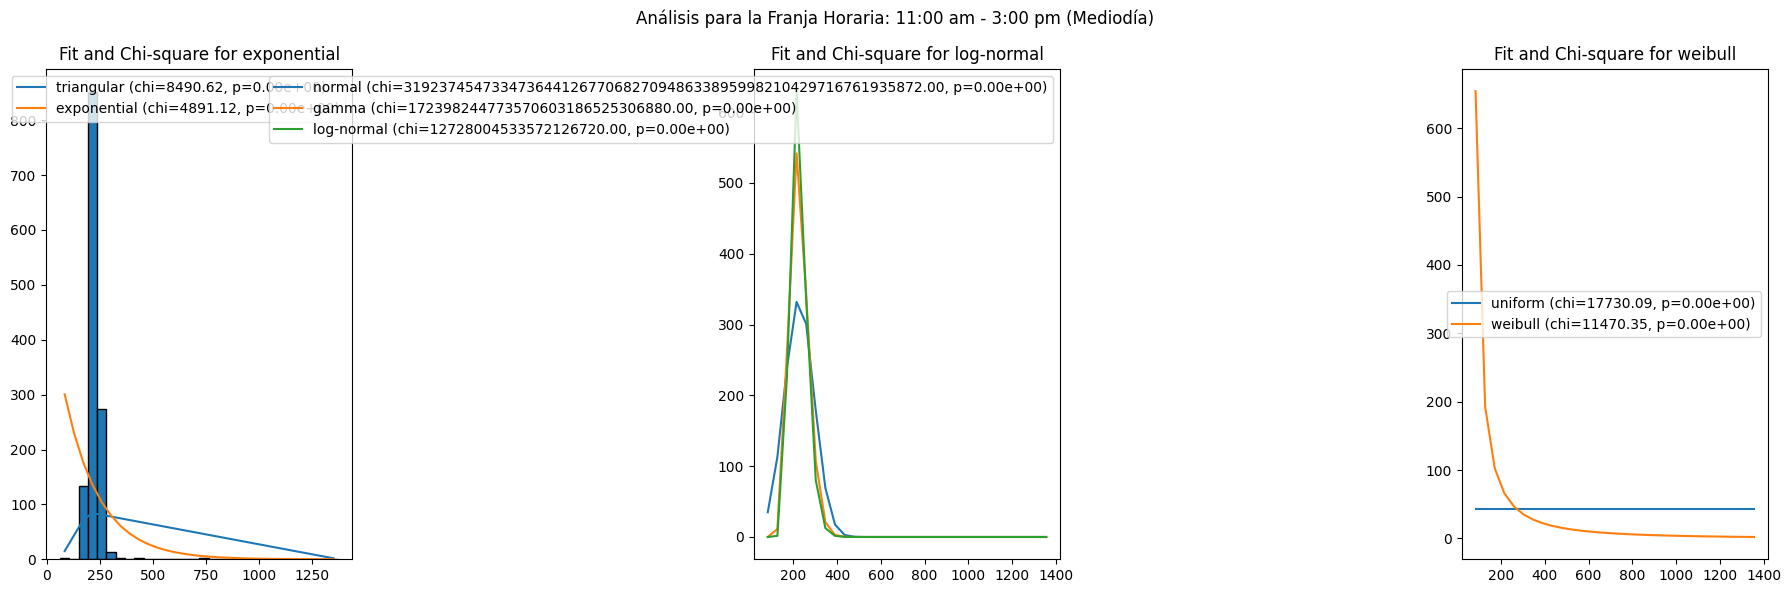

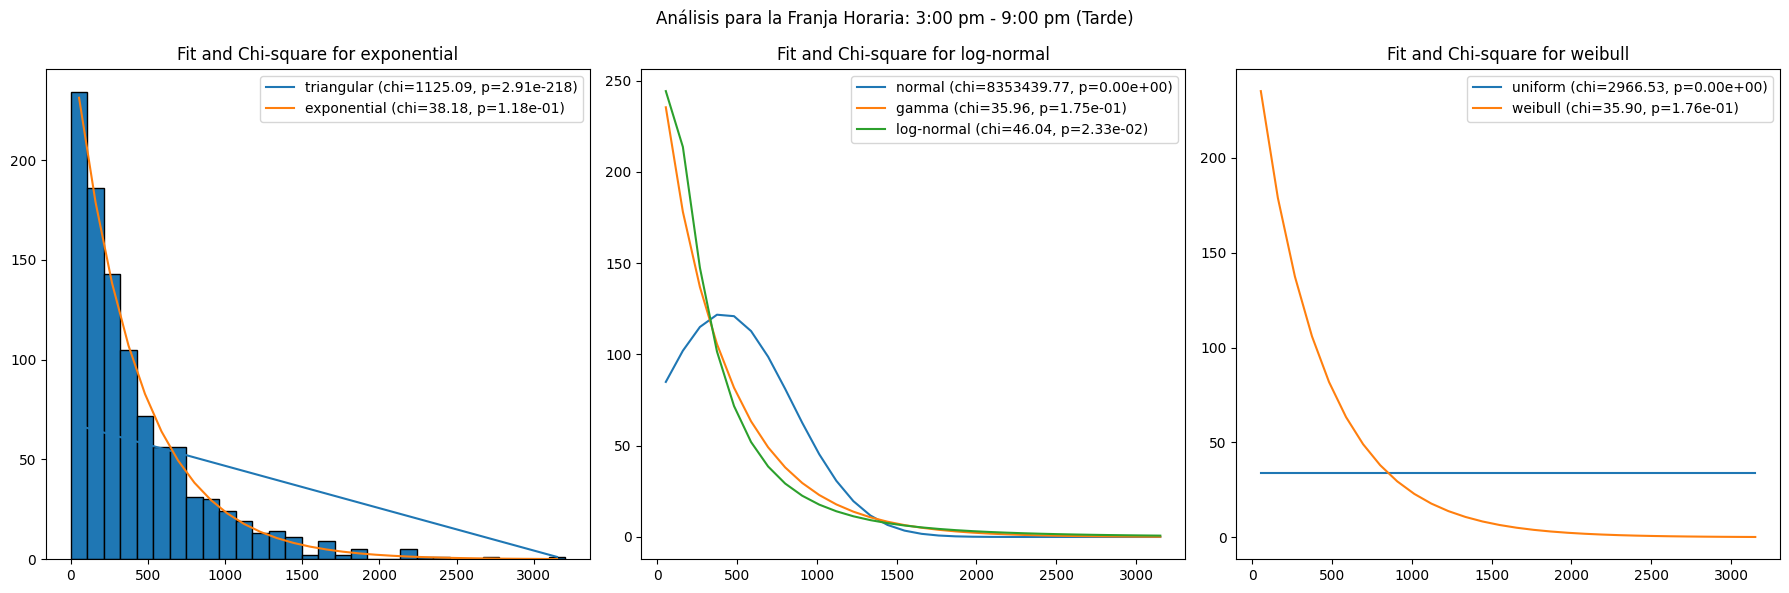

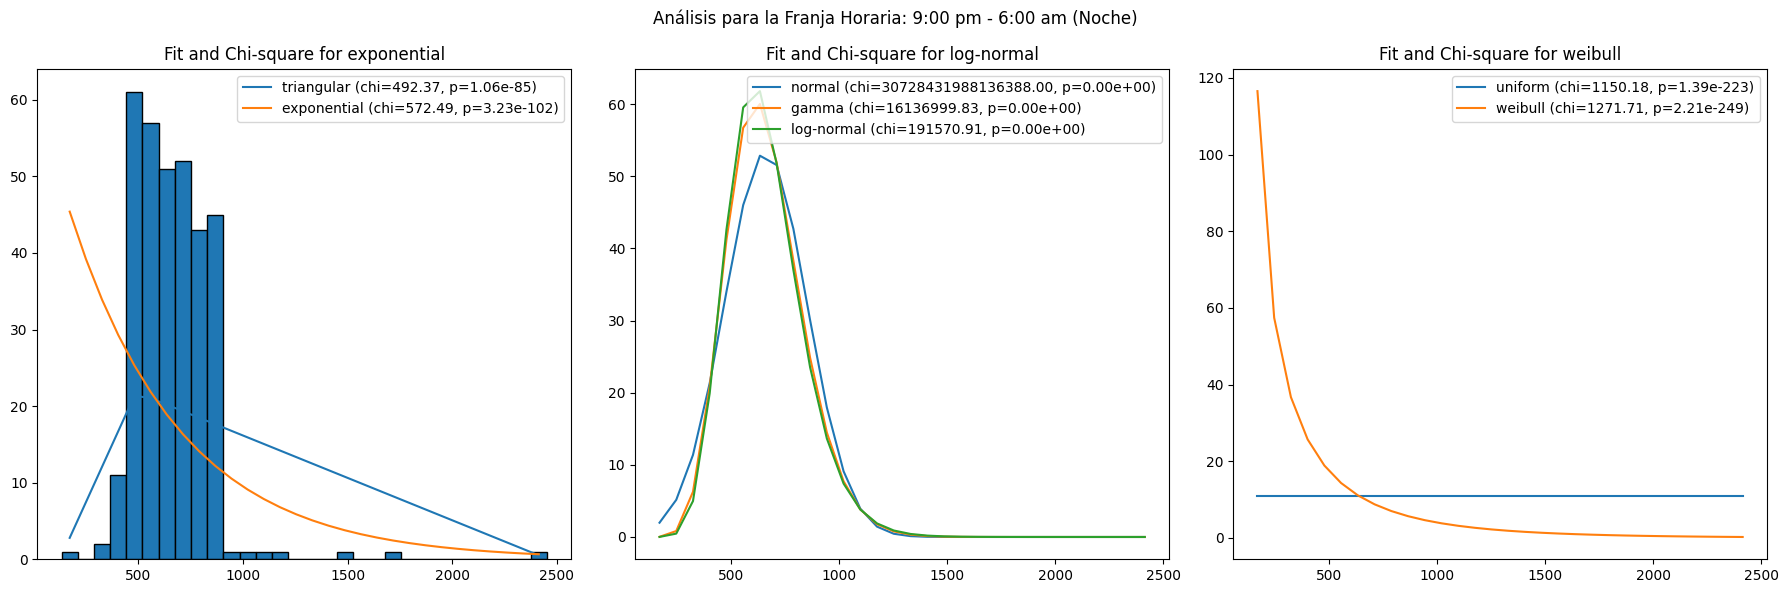

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Suponiendo que 'data_aviones' ya está cargado y preparado
# Carga de datos y preparación
data_aviones['Fecha de Llegada'] = pd.to_datetime(data_aviones['Fecha de Llegada'])
data_aviones.sort_values('Fecha de Llegada', inplace=True)

# Cálculo de tiempos entre arribos en segundos
data_aviones['Tiempo entre arribos (s)'] = data_aviones['Fecha de Llegada'].diff().dt.total_seconds()

# Definición de franjas horarias
bins = [0, 6, 11, 15, 21, 24]
labels = [
    '9:00 pm - 6:00 am (Noche a Mañana)',
    '6:00 am - 11:00 am (Mañana)',
    '11:00 am - 3:00 pm (Mediodía)',
    '3:00 pm - 9:00 pm (Tarde)',
    '9:00 pm - 6:00 am (Noche)'
]
data_aviones['Franja Horaria'] = pd.cut(data_aviones['Fecha de Llegada'].dt.hour, bins=bins, labels=labels, right=False, ordered=False)

# Agrupar por franja horaria
grouped_data = data_aviones.groupby('Franja Horaria')

# Función para generar gráficos y realizar pruebas de Chi-cuadrado
def analyze_and_chi_square(group, title):
    if group['Tiempo entre arribos (s)'].dropna().empty:
        print(f"No data for {title}")
        return  # Evitar procesamiento si el grupo está vacío
    
    # Histograma
    observed, bin_edges = np.histogram(group['Tiempo entre arribos (s)'].dropna(), bins=30)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    ax[0].bar(bin_centers, observed, width=np.diff(bin_edges), edgecolor='black')
    ax[0].set_title('Histograma de Tiempos entre Arribos')

    # Prueba de Chi-cuadrado para varias distribuciones
    distributions = {
        'normal': stats.norm,
        'uniform': stats.uniform,
        'triangular': stats.triang,
        'gamma': stats.gamma,
        'weibull': stats.weibull_min,
        'exponential': stats.expon,
        'log-normal': stats.lognorm
    }
    
    # Aplicar Chi-cuadrado y ajustar distribuciones
    for i, (name, dist) in enumerate(distributions.items(), start=1):
        params = dist.fit(group['Tiempo entre arribos (s)'].dropna())
        expected_pdf = dist.pdf(bin_centers, *params)
        expected_freq = expected_pdf / expected_pdf.sum() * observed.sum()
        
        # Chi-cuadrado
        chi_stat, p_value = stats.chisquare(observed, f_exp=expected_freq)

        # Plotting PDFs
        ax[i % 3].plot(bin_centers, expected_freq, label=f'{name} (chi={chi_stat:.2f}, p={p_value:.2e})')
        ax[i % 3].legend()
        ax[i % 3].set_title(f'Fit and Chi-square for {name}')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Aplicar la función a cada grupo de franja horaria
for name, group in grouped_data:
    title = f"Análisis para la Franja Horaria: {name}"
    analyze_and_chi_square(group, title)





## PUNTO B

In [ ]:
# Suponiendo que 'data_biométrico' ya está cargado correctamente
data_biométrico = pd.read_excel('Datos-Caso-III.xlsx', sheet_name='TiempoDeServicioBiométrico')

# Convertir cualquier columna de tiempo necesario a tipo numérico adecuado
data_biométrico['Tiempo de servicio (minutos)'] = data_biométrico['Tiempo de servicio (minutos)'].astype(float)

# Estadísticas descriptivas
print(data_biométrico['Tiempo de servicio (minutos)'].describe())

# Histograma de los tiempos de servicio
plt.figure(figsize=(8,5))
plt.hist(data_biométrico['Tiempo de servicio (minutos)'], bins=30, color='blue', edgecolor='black')
plt.title('Histograma de Tiempos de Servicio Biométrico')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Q-Q plot para evaluar la normalidad
stats.probplot(data_biométrico['Tiempo de servicio (minutos)'], dist="norm", plot=plt)
plt.title('Q-Q Plot de Tiempos de Servicio Biométrico')
plt.show()

# Aplicación de la prueba de Kolmogorov-Smirnov para comparar con una distribución normal
ks_statistic, p_value = stats.kstest(data_biométrico['Tiempo de servicio (minutos)'], 'norm', args=(data_biométrico['Tiempo de servicio (minutos)'].mean(), data_biométrico['Tiempo de servicio (minutos)'].std()))
print(f"Estadístico KS: {ks_statistic}, P-value: {p_value}")

# Comentarios sobre los resultados
if p_value < 0.05:
    print("Rechazamos la hipótesis nula de que los datos siguen una distribución normal.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula, los datos podrían ser normales.")


### D. Exponencial

In [ ]:
tiempos = data_biométrico['Tiempo de servicio (minutos)']

# Estimación del parámetro de la distribución exponencial
lambda_est = 1 / tiempos.mean()

# Q-Q Plot para la distribución exponencial
plt.figure(figsize=(8, 6))
stats.probplot(tiempos, dist="expon", sparams=(lambda_est,), plot=plt)
plt.title('Q-Q Plot para Distribución Exponencial')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados')
plt.show()

# Prueba de Kolmogorov-Smirnov para la distribución exponencial
ks_statistic, p_value = stats.kstest(tiempos, 'expon', args=(0, 1/lambda_est))
print(f"Estadístico KS: {ks_statistic}, P-value: {p_value}")

# Interpretación del resultado
if p_value < 0.05:
    print("Rechazamos la hipótesis nula de que los datos siguen una distribución exponencial.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula, los datos podrían ser exponenciales.")


### D. Log Norm

In [ ]:
# Asegurarse de que no hay valores negativos o ceros para la transformación logarítmica
tiempos = tiempos[tiempos > 0]

# Transformar datos a logarítmicos para estimación de parámetros
log_tiempos = np.log(tiempos)

# Estimación de parámetros para la distribución log-normal
shape, loc, scale = stats.lognorm.fit(tiempos, floc=0)  # Forzar la ubicación a 0 para simplificar

# Q-Q Plot para la distribución log-normal
plt.figure(figsize=(8, 6))
stats.probplot(log_tiempos, dist="norm", plot=plt)
plt.title('Q-Q Plot para Distribución Log-Normal')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados de log(tiempos)')
plt.show()

# Prueba de Kolmogorov-Smirnov para la distribución log-normal
ks_statistic, p_value = stats.kstest(tiempos, 'lognorm', args=(shape, loc, scale))
print(f"Estadístico KS: {ks_statistic}, P-value: {p_value}")

# Interpretación del resultado
if p_value < 0.05:
    print("Rechazamos la hipótesis nula de que los datos siguen una distribución log-normal.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula, los datos podrían ser log-normales.")


### D. Gamma

In [ ]:
# Cargar datos
data = pd.read_excel('Datos-Caso-III.xlsx', sheet_name='TiempoDeServicioBiométrico')
tiempos = data['Tiempo de servicio (minutos)']
tiempos = tiempos[tiempos > 0]  # Asegurarse de que los tiempos son positivos para el ajuste

# Ajustar parámetros de la distribución Gamma
alpha, loc, beta = stats.gamma.fit(tiempos)

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(tiempos, 'gamma', args=(alpha, loc, beta))

# Mostrar resultados de la prueba KS
print(f"Estadístico KS: {ks_statistic}, P-value: {p_value}")

# Generar Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(tiempos, dist="gamma", sparams=(alpha, loc, beta), plot=plt)
plt.title('Q-Q Plot para la Distribución Gamma')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados')
plt.show()



### D. Uniforme

In [ ]:
# Cargar datos
data = pd.read_excel('Datos-Caso-III.xlsx', sheet_name='TiempoDeServicioBiométrico')
tiempos = data['Tiempo de servicio (minutos)']
tiempos = tiempos[tiempos > 0]  # Asegurarse de que los tiempos son positivos para el ajuste

# Estimación de parámetros para la distribución uniforme
minimo, maximo = tiempos.min(), tiempos.max()

# Realizar la prueba de Kolmogorov-Smirnov para una distribución uniforme
ks_statistic, p_value = stats.kstest(tiempos, 'uniform', args=(minimo, maximo-minimo))

# Mostrar resultados de la prueba KS
print(f"Estadístico KS: {ks_statistic}, P-value: {p_value}")

# Generar Q-Q plot para la distribución uniforme
plt.figure(figsize=(8, 6))
stats.probplot(tiempos, dist="uniform", sparams=(minimo, maximo-minimo), plot=plt)
plt.title('Q-Q Plot para la Distribución Uniforme')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados')
plt.show()



### D. Weibull

In [ ]:
# Cargar datos
data = pd.read_excel('Datos-Caso-III.xlsx', sheet_name='TiempoDeServicioBiométrico')
tiempos = data['Tiempo de servicio (minutos)']
tiempos = tiempos[tiempos > 0]

# Ajustar parámetros de la distribución Weibull
shape, loc, scale = stats.weibull_min.fit(tiempos)

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(tiempos, 'weibull_min', args=(shape, loc, scale))

# Mostrar resultados de la prueba KS
print(f"Estadístico KS: {ks_statistic}, P-value: {p_value}")

# Generar Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(tiempos, dist="weibull_min", sparams=(shape, loc, scale), plot=plt)
plt.title('Q-Q Plot para la Distribución Weibull')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados')
plt.show()


### D. Triangular

In [ ]:
# Asumir que el modo es el promedio para simplificar, ajustar según sea necesario
modo = tiempos.mean()

# Ajustar parámetros de la distribución Triangular
minimo, maximo = tiempos.min(), tiempos.max()

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(tiempos, 'triang', args=((modo-minimo)/(maximo-minimo), minimo, maximo))

# Mostrar resultados de la prueba KS
print(f"Estadístico KS: {ks_statistic}, P-value: {p_value}")

# Generar Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(tiempos, dist="triang", sparams=((modo-minimo)/(maximo-minimo), minimo, maximo), plot=plt)
plt.title('Q-Q Plot para la Distribución Triangular')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados')
plt.show()


### Analisis y conclusiones

Después de evaluar varias distribuciones estadísticas para modelar los tiempos de servicio en el módulo biométrico, incluyendo la normal, Weibull, uniforme, triangular, y otras, la distribución Gamma ha demostrado ser la más adecuada. Los análisis mostraron que la distribución Gamma proporcionaba un ajuste significativamente bueno, confirmado por un p-value alto en la prueba de Kolmogorov-Smirnov, lo cual indica que no hay razón suficiente para rechazar la hipótesis de que los datos siguen esta distribución. 

Aunque otras distribuciones como la Weibull también se ajustaron razonablemente bien, la Gamma se destacó por su capacidad para modelar la asimetría y la variabilidad inherente a los tiempos de servicio

## PUNTO C

In [ ]:
# Cargar los datos desde el archivo Excel
data = pd.read_excel('Datos-Caso-III.xlsx', sheet_name='DatosLlegadaAviones')

# Contar la cantidad de cada tipo de avión
conteo_tipos = data['Tipo de Avión'].value_counts()

# Calcular la probabilidad de cada tipo de avión
probabilidades = conteo_tipos / conteo_tipos.sum()

# Mostrar las probabilidades
print(probabilidades)


 la probabilidad de que un avión sea mediano es del 59.97%, lo cual indica que la mayoría de los aviones que aterrizan son de tamaño mediano. En comparación, los aviones grandes y pequeños tienen probabilidades de 30.04% y 9.999%, respectivamente.

## PUNTO D

In [ ]:
# Cargar los datos desde el archivo Excel
data = pd.read_excel('Datos-Caso-III.xlsx', sheet_name='DatosPasajeros')

# Contar la cantidad de cada tipo de pasaporte
conteo_pasaportes = data['Tipo de pasaporte'].value_counts()

# Calcular la probabilidad de cada tipo de pasaporte
probabilidades_pasaporte = conteo_pasaportes / conteo_pasaportes.sum()

# Mostrar las probabilidades
print(probabilidades_pasaporte)


Extranjero: 55.9978% de los pasajeros son extranjeros. Esta es la mayoría, indicando que una gran proporción de los viajeros en este aeropuerto son visitantes internacionales.

Nacional no biométrico: 29.8877% de los pasajeros tienen pasaportes nacionales no biométricos. Este grupo representa casi un tercio de los pasajeros, sugiriendo una cantidad significativa de viajeros locales que no utilizan o no tienen acceso a la tecnología biométrica.

Nacional biométrico: 15.0145% de los pasajeros tienen pasaportes nacionales biométricos. Este es el grupo más pequeño, indicando que aunque algunos nacionales utilizan pasaportes biométricos, aún no son la mayoría.

## PUNTO E

In [ ]:
# Cargar los datos desde el archivo Excel
data = pd.read_excel('Datos-Caso-III.xlsx', sheet_name='DatosPasajeros')

# Contar la cantidad de pasajeros que llevan maleta
conteo_maletas = data['¿Lleva maleta?'].value_counts()

# Calcular la probabilidad de que el pasajero haya viajado con maleta
probabilidad_maleta = conteo_maletas / conteo_maletas.sum()

# Mostrar las probabilidades
print(probabilidad_maleta)


La mayoría de los pasajeros, más del 73%, deciden viajar con maletas, lo que sugiere un alto uso del servicio de equipaje facturado. Esta es una información crucial para la gestión del aeropuerto, ya que implica la necesidad de mantener y posiblemente ampliar las capacidades de manejo de equipaje